# Descriptive Statistics on CSV

Matplotlib visualizations of distributions of:
- birthyear
- deathyear
- gender
- nationality
- genes (non-timely AKA 1910s, 1950s, 2010s, etc.)

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import json
import numpy as np
import statistics as stats

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('white')


In [6]:
#nationality, gender and deathyear fixed in this file, corrected Nan values to blank, one third of death year replaced
df_original = pd.read_csv('artists_2.csv')

In [4]:
df_original.head()

,id,sortable_name,birthyear,deathyear,age,gender,nationality,hometown,location,similar_artists,similar_artists_names,genes,gene_types,artwork_link,artwork_names,published_artworks,pub_artworks_info
0,57c80d15a09a6753d4000a13,0331с and Grisha,Blank,Blank,0,Male,Russian,"Khimki, Moscow Oblast, Russia","Moscow, Russia",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=57c8...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
1,52c721e5b202a3edf1000072,03B Muren,Blank,Blank,0,Blank,Not specified,Blank,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=52c7...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
2,5cdae4d455d8c8318b939791,06D Atelier,Blank,Blank,0,Blank,Italian,Blank,"London, UK",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5cda...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
3,5d6f9f7e3a583e000e51956d,1+1+1,Blank,Blank,0,Blank,Finnish;Swedish;Icelandic,Blank,"Reykjavík, Iceland",https://api.artsy.net/api/artists?similar_to_a...,[],https://api.artsy.net/api/genes?artist_id=5d6f...,NaN,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd
4,5568f47672616954f4980000,1010,1979,Blank,0,Male,Not specified,Poland,Blank,https://api.artsy.net/api/artists?similar_to_a...,Sim artists json loc not readable,https://api.artsy.net/api/genes?artist_id=5568...,1970–present;21st Century;Abstract Art;Abstrac...,https://api.artsy.net/api/artworks?artist_id=5...,[],https://api.artsy.net/api/artworks?artist_id=5...,tbd


In [24]:
df_original.shape

(151711, 17)

In [533]:
df_original['birthyear'] = df_original['birthyear'].replace("1865l1855", "1865;1855")

In [58]:
#join all death years together to split then count distinct and then values of each distinct
birthyeartypes = ';'.join(df_original['birthyear'])

In [59]:
birthyeardf = pd.DataFrame(birthyeartypes.split(';'),columns=['birth year'])

In [60]:
byears = birthyeardf[np.logical_and(birthyeardf['birth year'] !='Blank', birthyeardf['birth year'] !='Not specified')]['birth year'].values
#reassign all to int
byears

array(['1979', '1978', '1976', ..., '1957', '1954', '1951'], dtype=object)

In [70]:
byears = [int(year) for year in byears]

In [71]:
byears = [year for year in byears if year > 0 and year < 2019]

In [104]:
#assignments for graphs
dyears = df_original[df_original['deathyear'] != 'Blank']['deathyear'].values
gender = df_original['gender'].values

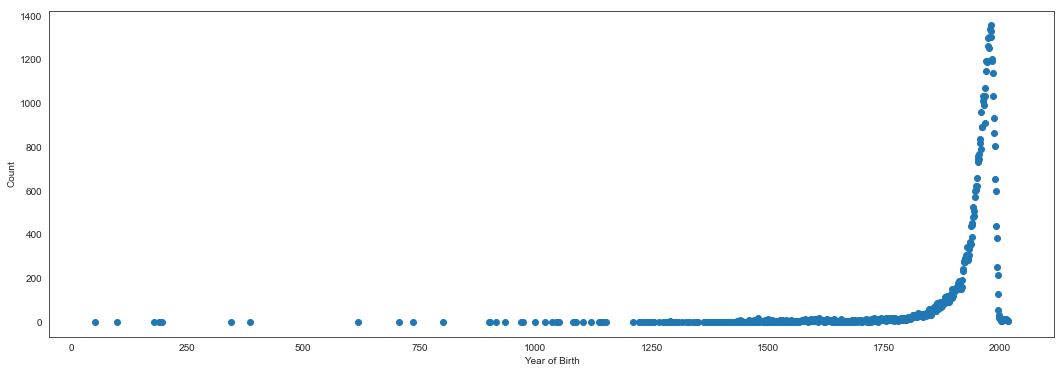

In [73]:
#birth year - what is going on on bottom of graph?
birthvalues, birthcount = np.unique(byears, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(18,6))

ax.scatter(birthvalues, birthcount)
plt.xlabel('Year of Birth')
plt.ylabel('Count')

plt.show()

In [94]:
df_original['deathyear'] = df_original['deathyear'].replace('', 'Not specified')

In [95]:
#join all death years together to split then count distinct and then values of each distinct
deathyeartypes = ';'.join(df_original['deathyear'])

In [116]:
deathyeardf=pd.DataFrame(deathyeartypes.split(';'),columns=['death year'])
deathyeardf['death year'].values

array(['Blank', 'Blank', 'Blank', ..., 'Blank', 'Blank', 'Blank'],
      dtype=object)

In [117]:
deathyearplot = deathyeardf[np.logical_and(deathyeardf['death year'] != 'Blank', deathyeardf['death year'] != 'Not specified')]['death year'].values

In [128]:
# pd.Index(deathyearplot).get_loc('')
# deathyearplot = np.delete(deathyearplot, 7328)
deathyearplot = [int(year) for year in deathyearplot]

In [136]:
deathyearplot = [year for year in deathyearplot if year > 700]

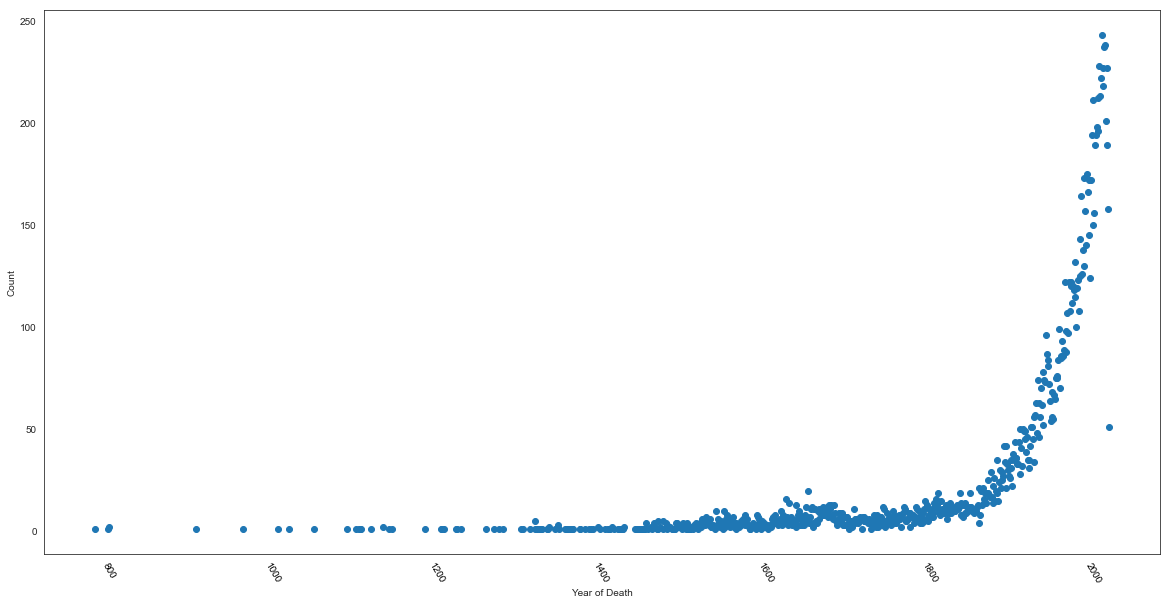

In [137]:
#deathyear
dyearvalues, dyearcount = np.unique(deathyearplot, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.tick_params(axis="x", labelsize=10, labelrotation=-60, labelcolor='black')
ax.scatter(dyearvalues, dyearcount)
plt.xlabel('Year of Death')
plt.ylabel('Count')
plt.show()
#year of death sorted chronologically

In [ ]:
# Scatter plot above shows:
# line streaks: meaning that deathyear inputs are repeatedly rounded, skewed/unreliable information
# more accurate death year information of people who died in 20th century
#lots of artists in database who lived in the 19th/20th centruy, and a few who preceded them, very few after (recent)
#sharp drop on right because closer to present, information may not be updated consistently
#QUESTION: how do i establish a range of years on x axis (...1800, 18500, 1900, 1950, 2000) to group and better see
#manually?^

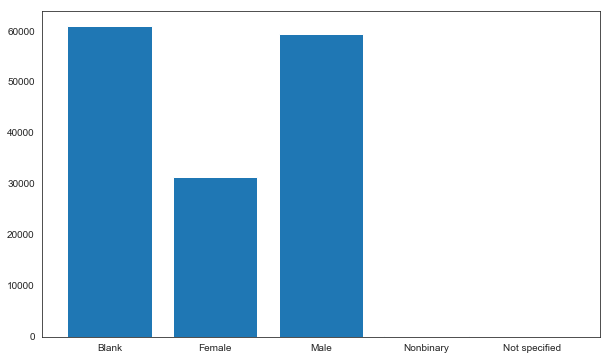

In [43]:
#gender distribution
gendervalues, gendercount = np.unique(gender, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.bar(gendervalues, gendercount)

plt.show()

In [144]:
df_original['gender'].value_counts()

Blank            60936
Male             59349
Female           31275
Nonbinary          150
Not specified        1
Name: gender, dtype: int64

In [ ]:
#A little less than half of all artists did not specify their gender (left blank or not filled)
#almost double men than women in the data base -- interesting for gender bias in art questions 
#very few nonbinary and one not specified (defined not applicable in profile)

In [28]:
#join all nationalities together to split then count distinct and then values of each distinct
nationalitytypes = ';'.join(df_original['nationality'])

In [29]:
nationalitydf=pd.DataFrame(nationalitytypes.split(';'),columns=['nationalities'])

In [146]:
nationalityplot = nationalitydf['nationalities'].values

In [31]:
nationality_dist=nationalitydf.nationalities.value_counts()

In [32]:
nationalitytest=nationality_dist.sort_values(ascending=False)
#get the top 20 distinct values and their counts
nationality_lim=nationalitytest.iloc[0:20]
#exclude blanks or not specifieds
nationality_lim_no_blank = nationalitytest.iloc[1:21]

In [33]:
print(len(nationality_dist), 'different nationalities, including not specified (means not filled out)')

287 different nationalities, including not specified (means not filled out)


Text(16.200000000000017, 0.5, 'Count')

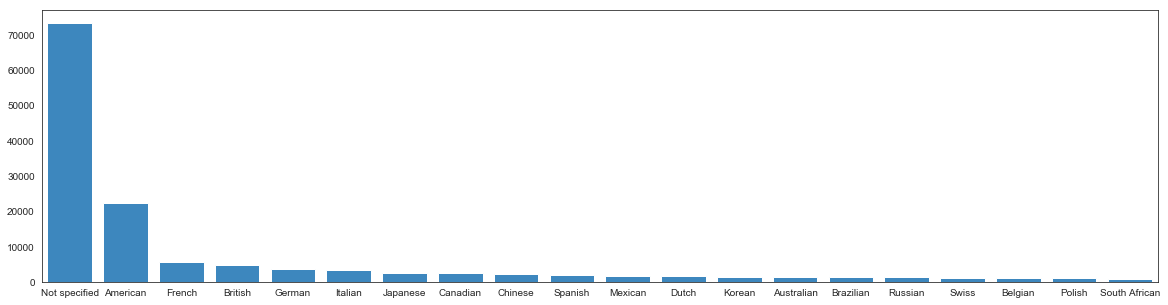

In [40]:
#nationality distribution with seaborn - top 20 nats
nat_names = list(nationality_lim.index)
nat_count = nationality_lim.values
plt.figure(figsize=(20,5))
graph = sns.barplot(x = nat_names, y=nat_count, color = "#288AD3")
graph2.set_xlabel('Nationality')
graph2.set_ylabel('Count')

In [ ]:
#not specified or blank nationalities take up the majority of artist profiles - out of 151,000 artists
#European and American nationalities take up a great majority, as well as japanese chinese - not surprising when thinking about 
#the history of the influence and importance of art in certain parts of the world (Ancient China and Japan, Europe)
#287 different nationalities - ranging from Native American/Canadian/Australian,etc. to tribes in Africa, 
#ethnic groups in Asia, the Middle East and the Mediterranean

Text(0, 0.5, 'Count')

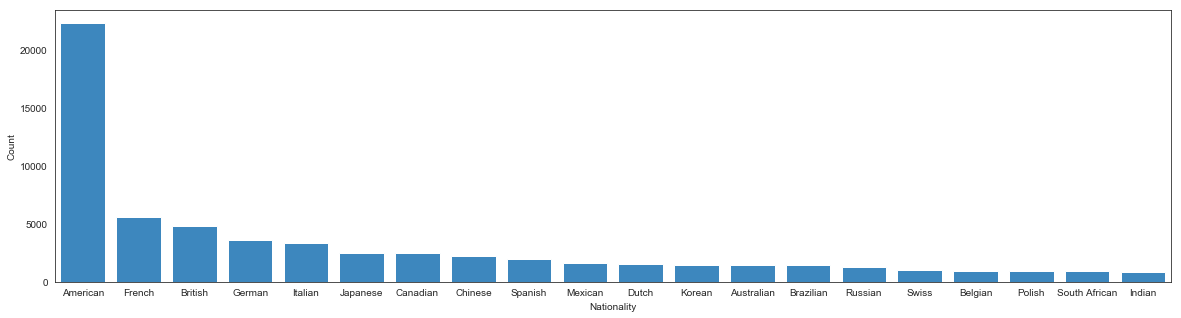

In [39]:
#top 20 nationalities without not specifieds
nat_names_no_blank = nationality_lim_no_blank.index
nat_count_no_blank = nationality_lim_no_blank.values
plt.figure(figsize=(20,5))
graph2 = sns.barplot(x = nat_names_no_blank, y=nationality_lim_no_blank.values, color = "#288AD3")
graph2.set_xlabel('Nationality')
graph2.set_ylabel('Count')

In [ ]:
#Americans make up majority of artist profiles - this includes people who labeled themselves as Chinese;American etc.


In [7]:
df_original['gene_types'].unique()

array([nan,
       '1970–present;21st Century;Abstract Art;Abstract Illusionism;Biomorphic',
       '1970–present;21st Century;Abstract Art;Abstract Painting;Biomorphic',
       ..., '1970–present;21st Century;Body Parts;Canada;Collage',
       '1970–present;1990s;21st Century;Color Photography;Flora',
       "1970–present;21st Century;Animals;Children's Furniture and Design;Contemporary Faux Naïf"],
      dtype=object)

In [8]:
df_original.gene_types = df_original.gene_types.astype('str') 

In [9]:
genetypes = ';'.join(df_original['gene_types'])

In [10]:
genesdf=pd.DataFrame(genetypes.split(';'),columns=['Gene_types'])

In [11]:
genesplot = genesdf['Gene_types'].values
genes_dist=genesdf.Gene_types.value_counts()

In [17]:
genestest=genes_dist.sort_values(ascending=False)
#get the top 20 distinct values and their counts
genes_lim=genestest.iloc[0:20]
#exclude Nan or not json readable
genes_lim_no_blank = genestest.iloc[2:22]

In [62]:
print(len(genes_dist), '-different types of genes, including "json not readable" and a blank space for artists without specified genes')

641 -different types of genes, including "json not readable" and a blank space for artists without specified genes


Text(0.5, 1.0, 'Top 20 Gene types')

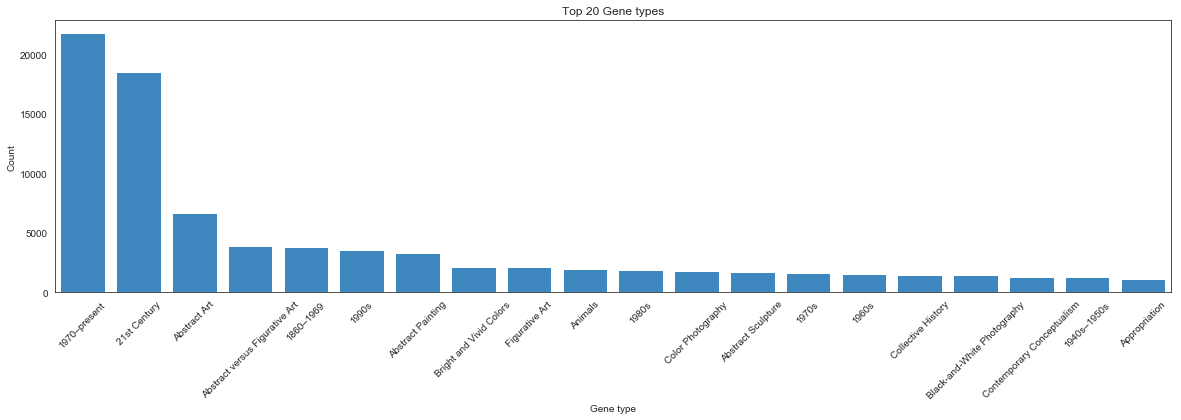

In [76]:
#genes distribution with seaborn - top 20 genes
gene_names = list(genes_lim_no_blank.index)
gene_count = genes_lim_no_blank.values
plt.figure(figsize=(20,5))
graph = sns.barplot(x = gene_names, y=gene_count, color = "#288AD3")
graph.set_xlabel('Gene type')
graph.set_xticklabels(gene_names, rotation=45)
graph.set_ylabel('Count')
plt.title('Top 20 Gene types')